In [1]:
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

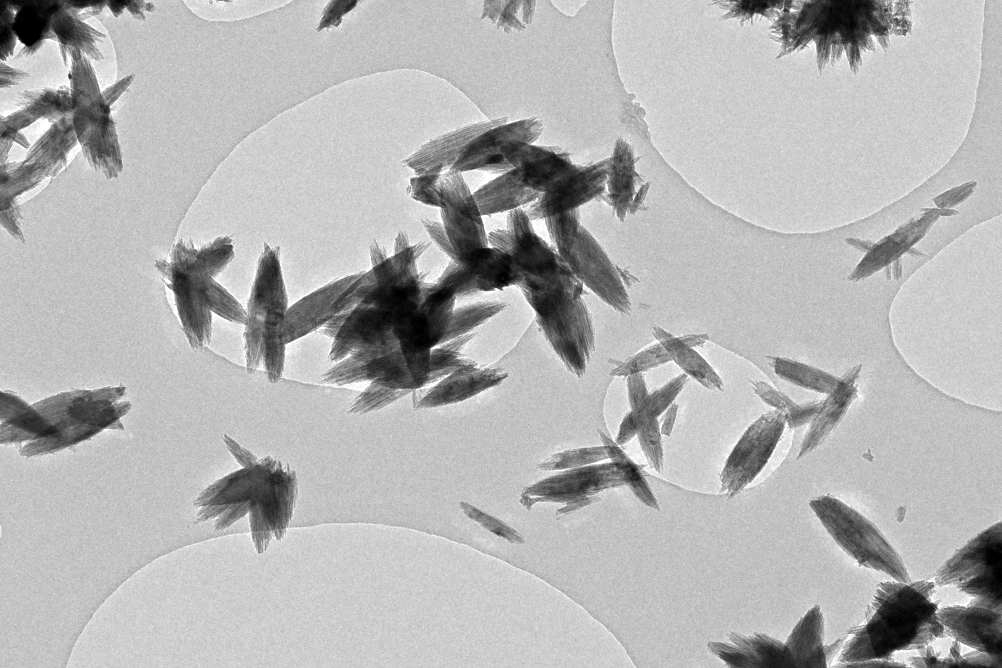

In [2]:
input_image = Image.open(r'Sample 22_10k mag_0004.tif')
#img_PIL.show()
display(input_image)


In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np


# Here we import the image file as an array of shape (nx, ny, nz)
image_file = 'Sample 22_10k mag_0004.tif'
input_image = np.array(Image.open(image_file))  # this is the array representation of the input image




In [4]:
def sobel_kernel (input_image):
    #Initializing the arrays of smoothed first derivatives in ‘x’ and ‘y’
    gx = [[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]]
    gy = [[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]]
    gx = np.array(gx)
    gy = np.array(gy)
    
    #Declaring the resulted image after the filtering process
    rows =  len(input_image)
    cols =  len(input_image[0]) 
    filtered_image = np.zeros(shape=(rows, cols))  

    #applying the filter for both axis: x and y. 
    #This depends on assigning border values to zero which is resonable for these two reasons:
    #1)The value will be small, because most of the kernel values will be multiplied by zeros (padded values)
    #2)Mostly, the area of interest will be in the middle of the image and its surroundings not in the 4 borders lines
    for i in range(rows - 2):
        for j in range(cols - 2):
            x = np.sum(np.multiply(gx, input_image[i:i + 3, j:j + 3]))  
            y = np.sum(np.multiply(gy, input_image[i:i + 3, j:j + 3]))  
            filtered_image[i + 1, j + 1] = np.sqrt(x ** 2 + y ** 2)  
            
    return filtered_image


Text(0.5, 1.0, 'Filtered image with sobel kernel')

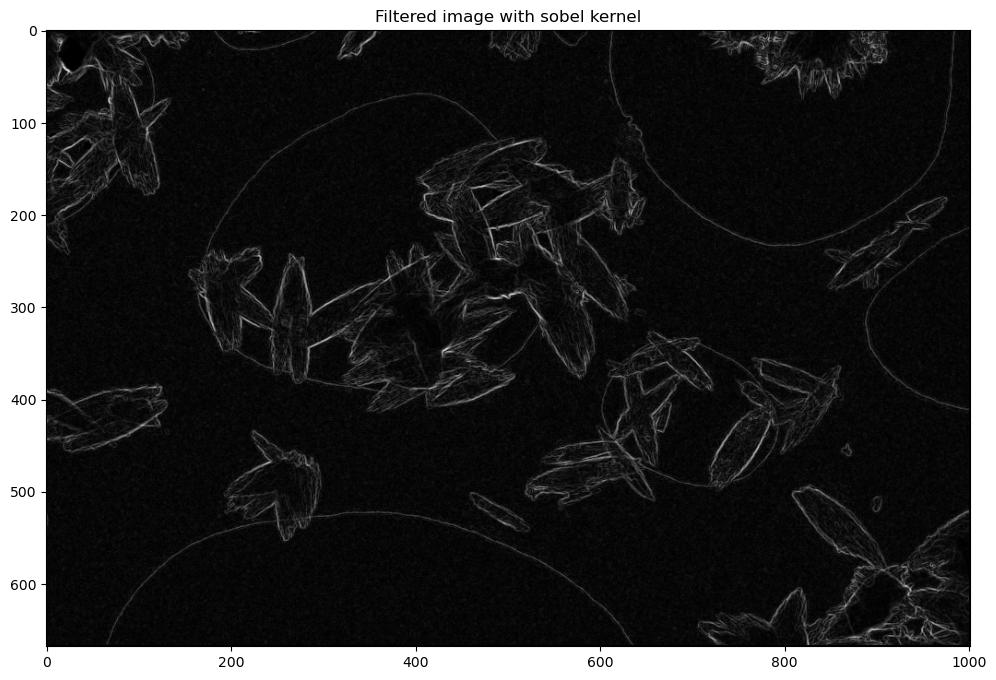

In [5]:
sobel_filtered = sobel_kernel (input_image)
plt.figure (figsize = (12,8))
plt.imshow(sobel_filtered,  cmap=plt.get_cmap('gray'))
plt.title ("Filtered image with sobel kernel")

# Second part: after median:

In [6]:
def median_filter(image, filter_size):
    #dummy variable to add the values that are corresponding to the kernel
    dummy = []
    limit = filter_size // 2
    filtered_image = np.zeros_like(image)
    #Initializing kernal depending on the filter size
    kernal = [
        [i, j]
        for i in range(-limit, filter_size-limit)
        for j in range(-limit, filter_size-limit)]
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):  
            for m, n in kernal: 
                #I will not use the padding technique but instead I will assign out of bounds values to zeros.
                if (i+m < 0) or (j+n < 0) or (len(image) <= i+m) or (len(image[0]) <= j+n):
                    dummy.append(0)
                else: 
                    dummy.append(image[i+m][j+n])
            
            filtered_image[i][j] = np.median(dummy)
            dummy = []
                
    return filtered_image

In [7]:
median = median_filter(input_image, 5)
filtered_image = sobel_kernel(median)

Text(0.5, 1.0, 'Image filtered with sobel kernel after applying median filter')

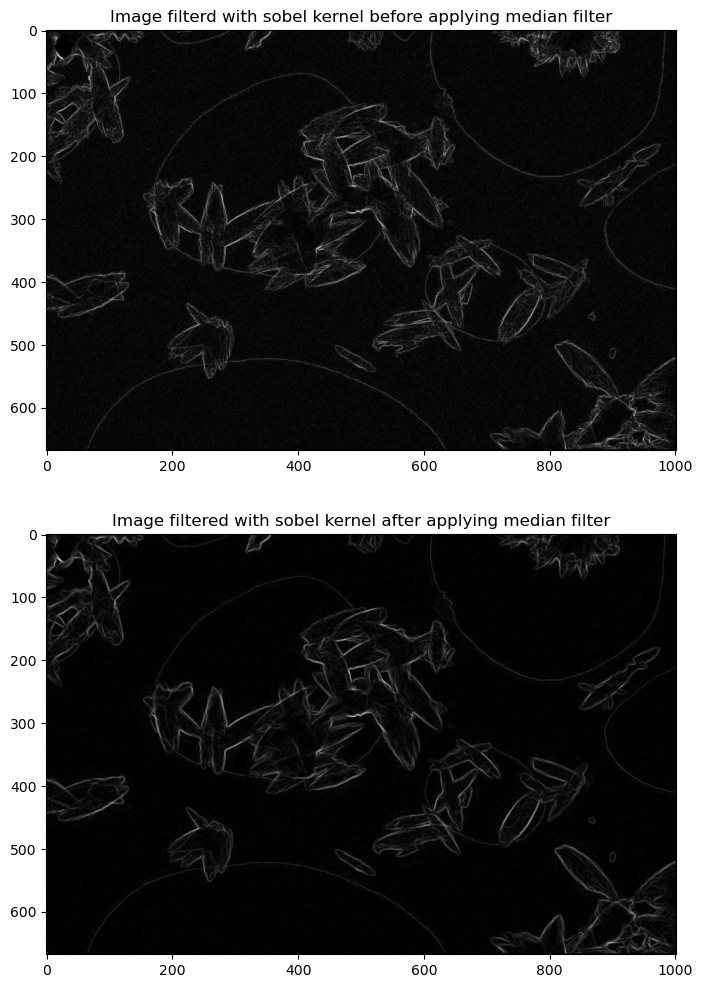

In [8]:
plt.figure (figsize = (20,12))
plt.subplot(211)
plt.imshow(sobel_filtered,  cmap=plt.get_cmap('gray'))
plt.title("Image filterd with sobel kernel before applying median filter")
plt.subplot(212)
plt.imshow(filtered_image,  cmap=plt.get_cmap('gray'))
plt.title("Image filtered with sobel kernel after applying median filter")

#### Draft for the comparison: 
- before median: internal details were clearer while after it is almost disappered. 
- After median: we have only the edges but the edges of bubbles is so vague, do we need it? also the edges are not as vivid as before ?! 

# Third quesione: 

In [9]:
def histogram (image): 
    values = [i for i in range (256)]
    count = []
    flatten_image = image.flatten()

    for i in range (256):
        count.append(np.count_nonzero(flatten_image == i))

    return values , count

Text(0, 0.5, 'Count of pixels')

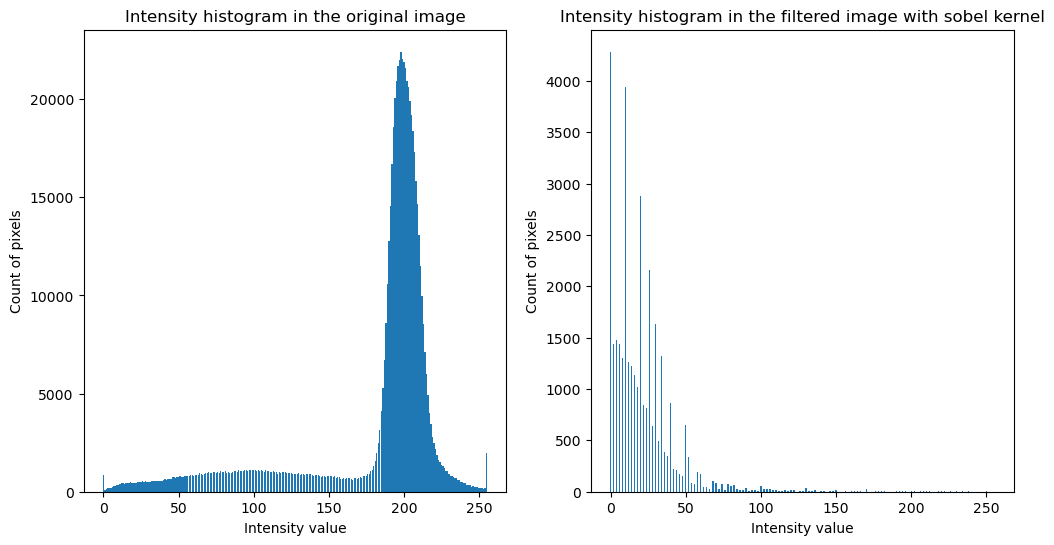

In [10]:
xoriginal, yoriginal = histogram (input_image)
xsobel , ysobel = histogram (sobel_filtered)

plt.figure (figsize = (12,6))

plt.subplot(121)
plt.bar(xoriginal,yoriginal)
plt.title("Intensity histogram in the original image")
plt.xlabel("Intensity value")
plt.ylabel("Count of pixels")

plt.subplot(122)
plt.bar(xsobel,ysobel)
plt.title("Intensity histogram in the filtered image with sobel kernel")
plt.xlabel("Intensity value")
plt.ylabel("Count of pixels")

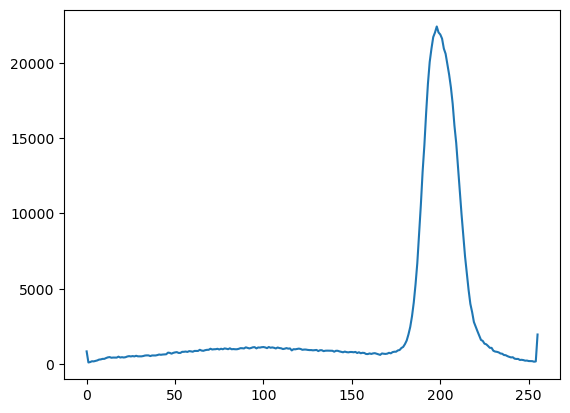

In [11]:
import cv2
# create the histogram
histr = cv2.calcHist([input_image],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [12]:
def thresholding (image, level): 
    result = np.zeros_like(image)
    
    for i in range (len(image)):
        for j in range (len(image[0])):
            result[i][j] = level < image[i][j]
    return result*255

Text(0.5, 1.0, 'Image after doing thresholding with level of 160')

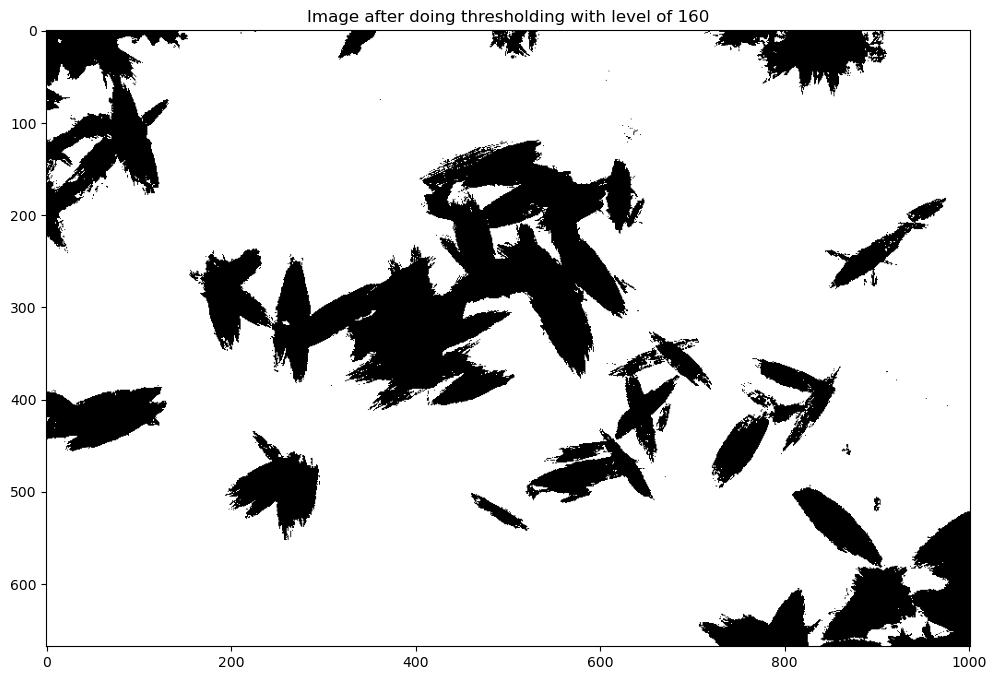

In [13]:
thresholded_image = thresholding (input_image, 160)

plt.figure (figsize = (12 , 8))
plt.imshow(thresholded_image,cmap=plt.get_cmap('gray'))
plt.title ("Image after doing thresholding with level of 160")

Text(0.5, 1.0, 'Filtered image with soble kernel after doing thresholding')

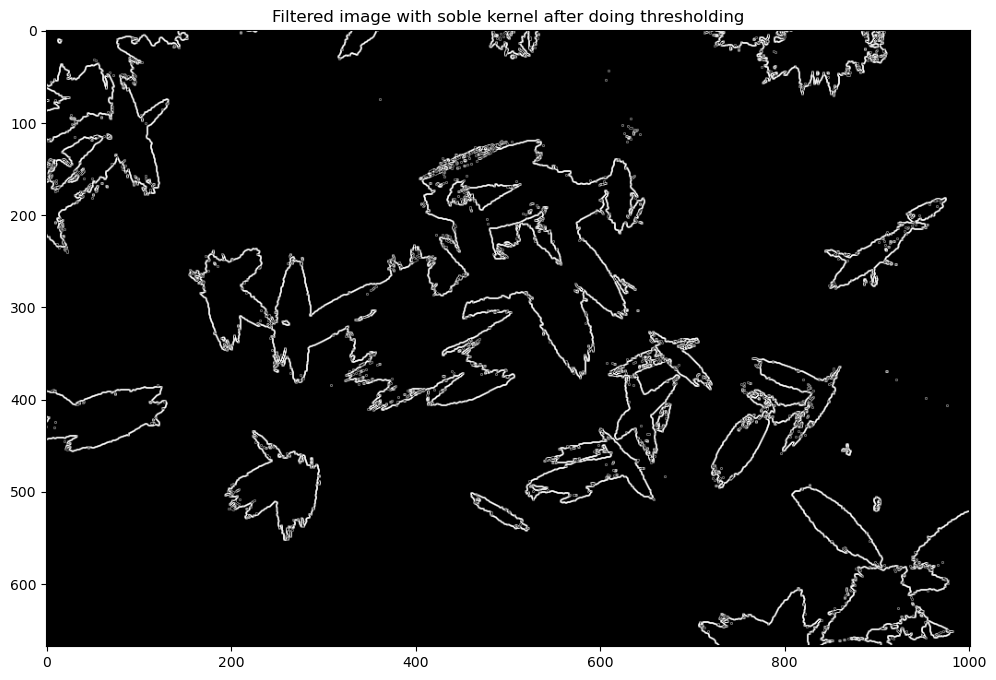

In [15]:
sobel_filtered1 = sobel_kernel (thresholded_image)

plt.figure (figsize = (12,8))
plt.imshow(sobel_filtered1,  cmap=plt.get_cmap('gray'))
plt.title ("Filtered image with soble kernel after doing thresholding")

In [16]:
median_thersh = median_filter(thresholded_image, 5)
filtered_image = sobel_kernel(median_thersh)

Text(0.5, 1.0, 'Image resulted from applying thresholding, median filter, and sobel filter consecutively')

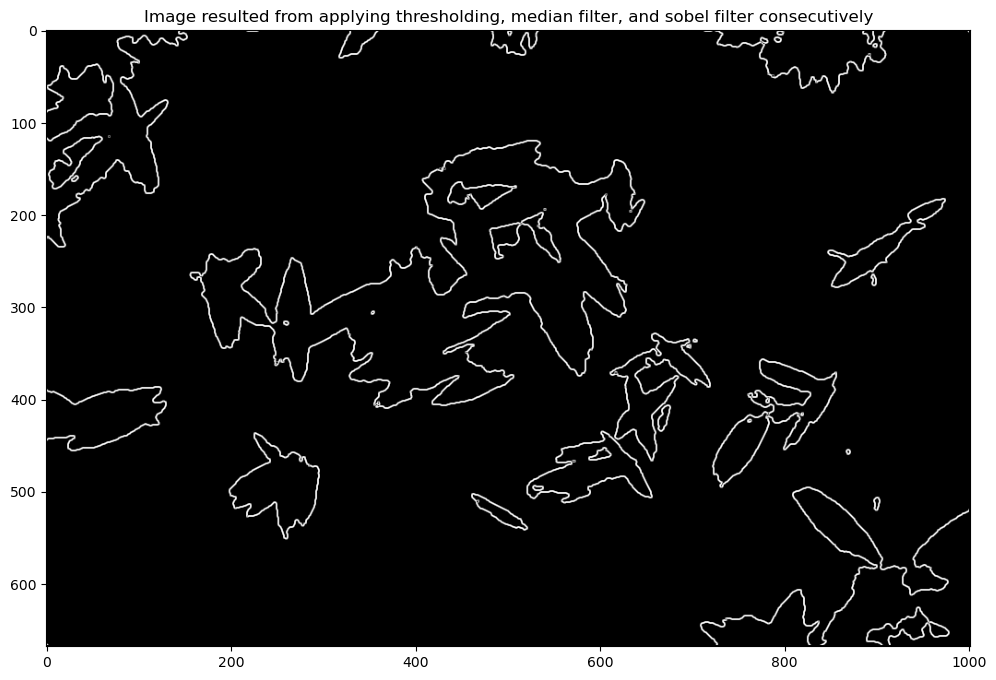

In [17]:
plt.figure (figsize = (12,8))
plt.imshow(filtered_image,  cmap=plt.get_cmap('gray'))
plt.title("Image resulted from applying thresholding, median filter, and sobel filter consecutively")